In [ ]:

# 数据表第一行是列名，列0代表y，列1-6代表x1-x6；
# 请给出建模过程及模型评价；
# 注意在建模过程中进行降维，并阐述理由


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error as MSE

data = pd.read_csv("test_1.csv")
feature_cols = ['1', '2', '3', '4','5','6']
label = ['0']

x = data[feature_cols] # Features
# x_train = np.asarray(x)

y = data[label] # Target variable
# y_train = np.asarray(y)


In [2]:
data

,0,1,2,3,4,5,6
0,0.003521,0.678261,0.363636,0.604003,0.224299,0.477273,0.066179
1,0.021127,0.713043,0.418182,0.618797,0.233645,0.636364,0.557475
2,0.126761,0.730435,0.436364,0.509536,0.271028,0.715909,0.957646
3,0.454225,0.686957,0.454545,0.597773,0.429907,0.750000,0.258835
4,0.728873,0.547826,0.454545,0.555343,0.691589,0.772727,0.888624
...,...,...,...,...,...,...,...
8265,0.700704,0.139130,0.109091,0.689386,0.373832,0.500000,0.960515
8266,0.697183,0.130435,0.109091,0.708936,0.373832,0.488636,0.782810
8267,0.697183,0.130435,0.109091,0.723254,0.373832,0.488636,0.983101
8268,0.510563,0.130435,0.109091,0.690338,0.373832,0.488636,0.269127


In [3]:
# 将共计8270组数据，让其训练集/测试集 = 5/1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# x_train.shape

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

In [5]:
reg = LR().fit(pca_x_train, y_train)
y_pred1 = reg.predict(pca_x_test)

# y_pred
print(reg.coef_)
print(reg.intercept_)

[[-0.00350453 -0.1698026   0.25904942]]
[0.85697126]


In [6]:
MSE(y_test, y_pred1)

0.005218875221436717

In [7]:
np.sqrt(MSE(y_test, y_pred1))/y_test.mean()

0    0.084478
dtype: float64

In [8]:
r2_score(y_test,y_pred1)

0.2672068019219995

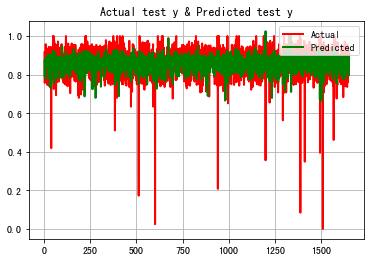

In [9]:
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label='Actual')
plt.plot(t, y_pred1, 'g-', linewidth=2, label='Predicted')
plt.title('Actual test y & Predicted test y')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [ ]:
# using neural network to do regression

In [10]:
from keras.layers import Dense, Activation
from keras.models import Sequential

model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(64, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 8, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(x_train, y_train, batch_size = 10, epochs = 30)

Using TensorFlow backend.


Epoch 1/30
6616/6616 [==============================] - 1s 184us/step - loss: 0.0588 
Epoch 2/30
6616/6616 [==============================] - 1s 160us/step - loss: 0.0035
Epoch 3/30
6616/6616 [==============================] - 1s 157us/step - loss: 0.0027
Epoch 4/30
6616/6616 [==============================] - 1s 153us/step - loss: 0.0024
Epoch 5/30
6616/6616 [==============================] - 1s 153us/step - loss: 0.0023
Epoch 6/30
6616/6616 [==============================] - 1s 153us/step - loss: 0.0023
Epoch 7/30
6616/6616 [==============================] - 1s 165us/step - loss: 0.0022
Epoch 8/30
6616/6616 [==============================] - 1s 157us/step - loss: 0.0022
Epoch 9/30
6616/6616 [==============================] - 1s 155us/step - loss: 0.0022 0s 
Epoch 10/30
6616/6616 [==============================] - 1s 155us/step - loss: 0.0022
Epoch 11/30
6616/6616 [==============================] - 1s 159us/step - loss: 0.0021
Epoch 12/30
6616/6616 [==============================] - 1

In [11]:
y_pred2 = model.predict(x_test)

In [12]:
MSE(y_test, y_pred2)

0.0019198530786488127

In [13]:
np.sqrt(MSE(y_test, y_pred2))/y_test.mean()

0    0.051238
dtype: float64

In [14]:
r2_score(y_test,y_pred2)

0.7304294090871822

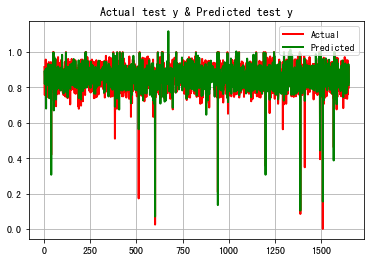

In [15]:
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label='Actual')
plt.plot(t, y_pred2, 'g-', linewidth=2, label='Predicted')
plt.title('Actual test y & Predicted test y')
plt.legend(loc='upper right')
plt.grid()
plt.show()